In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [2]:
data = load_breast_cancer()

In [3]:
y = data["target"]

In [4]:
data = pd.DataFrame(data = data["data"], columns=data["feature_names"])

In [5]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [6]:
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron as P
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score

In [7]:
ss = StandardScaler()

In [8]:
# clf = MLP((100,), activation="logistic", solver = "lbfgs")
# clf = P()
clf = SVC(probability=True)

In [9]:
d = data.copy()
d = ss.fit_transform(d)

# 1) Escolher estimador

In [68]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [407]:
X_train, X_test, y_train, y_test = train_test_split(d, y, test_size = .3)

In [25]:
# clf = MLP((100,), activation="logistic", solver = "lbfgs")
# clf = P()
clf = SVC(probability=True)

In [38]:
# ens = AdaBoostClassifier()
ens = BaggingClassifier(clf, n_estimators=100, max_samples=.85, max_features=.9, oob_score=True, n_jobs=3)
# ens = clf

In [39]:
# est = clf
est = ens

In [40]:
est.fit(X_train,y_train)

BaggingClassifier(base_estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=0.9,
         max_samples=0.85, n_estimators=100, n_jobs=3, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [41]:
e1 = roc_auc_score(y_train, est.predict_proba(X_train)[:,-1])
e2 = roc_auc_score(y_test, est.predict_proba(X_test)[:,-1])
print("Train AUC:\t %.4f \nTest AUC:\t %.4f" % (e1,e2))

Train AUC:	 0.9988 
Test AUC:	 0.9925


In [72]:
kf = KFold(n_splits= 5, shuffle = True)
s = cross_val_score(est, d, y, scoring="roc_auc", cv = kf)
s

array([ 0.99424552,  0.98842593,  1.        ,  0.99599064,  0.9989726 ])

In [73]:
import numpy as np

In [74]:
np.mean(s), np.std(s)

(0.99552693956005633, 0.0041027382744017512)

# 2) Encontrar instâncias incorretamente classificadas

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt

In [70]:
pred = est.predict_proba(X_test)[:,-1]

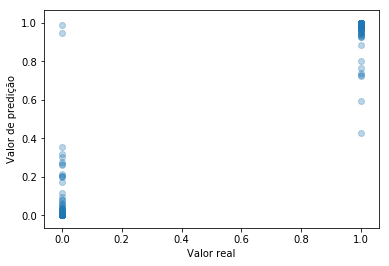

In [76]:
plt.scatter(y_test, pred, alpha = .3)
plt.ylabel("Valor de predição")
plt.xlabel("Valor real")

In [49]:
th = min(pred[y_test==1]) # pegar treshold de erros para a classe 0 (menor valor de predição da classe 1 (poderiam ser valores diferentes...))

In [51]:
pred =  est.predict_proba(d)[:,-1]

In [52]:
m = (y==0) & (pred > th) # linhas em que o alvo vale 0, mas a predição está acima de th

# 3) Comparar estatisticamente os erros com o resto

In [62]:
data.loc[m].std(axis = 0)

mean radius                  1.304479
mean texture                 2.368540
mean perimeter               8.698573
mean area                  111.113147
mean smoothness              0.011019
mean compactness             0.032899
mean concavity               0.026855
mean concave points          0.012385
mean symmetry                0.013320
mean fractal dimension       0.003898
radius error                 0.152059
texture error                0.498176
perimeter error              0.956774
area error                  11.312356
smoothness error             0.001642
compactness error            0.006538
concavity error              0.007884
concave points error         0.003279
symmetry error               0.003571
fractal dimension error      0.000753
worst radius                 1.626271
worst texture                4.984047
worst perimeter             11.522745
worst area                 156.292502
worst smoothness             0.017534
worst compactness            0.095988
worst concav

In [65]:
compare = pd.concat((data.std(axis = 0), data.loc[m].std(axis = 0)), axis = 1)
compare.columns = ["geral", "miss"]
compare

,geral,miss
mean radius,3.524049,1.304479
mean texture,4.301036,2.368540
mean perimeter,24.298981,8.698573
mean area,351.914129,111.113147
mean smoothness,0.014064,0.011019
mean compactness,0.052813,0.032899
mean concavity,0.079720,0.026855
mean concave points,0.038803,0.012385
mean symmetry,0.027414,0.013320
mean fractal dimension,0.007060,0.003898


# 4) Visualizar distinção entre erro e resto

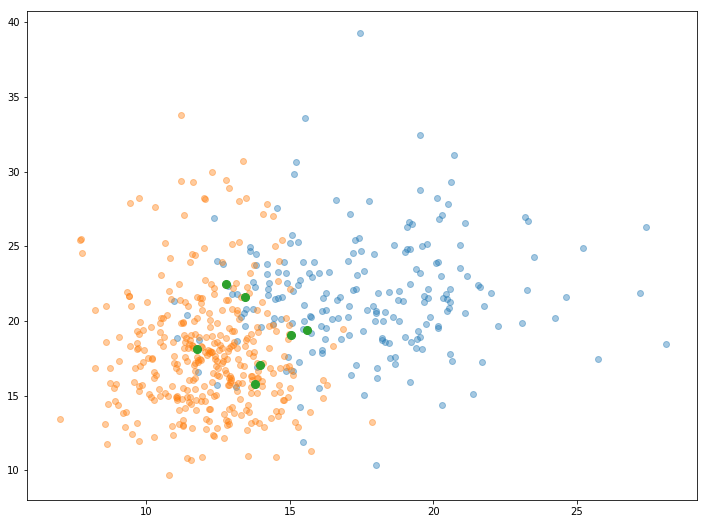

In [55]:
plt.figure(figsize=(12,9))

for i in {0, 1}:
    plt.scatter(data.loc[y==i, "mean radius"], data.loc[y==i, "mean texture"], alpha = .4)
plt.scatter(data.loc[m, "mean radius"], data.loc[m, "mean texture"], alpha = 1, s = 65)

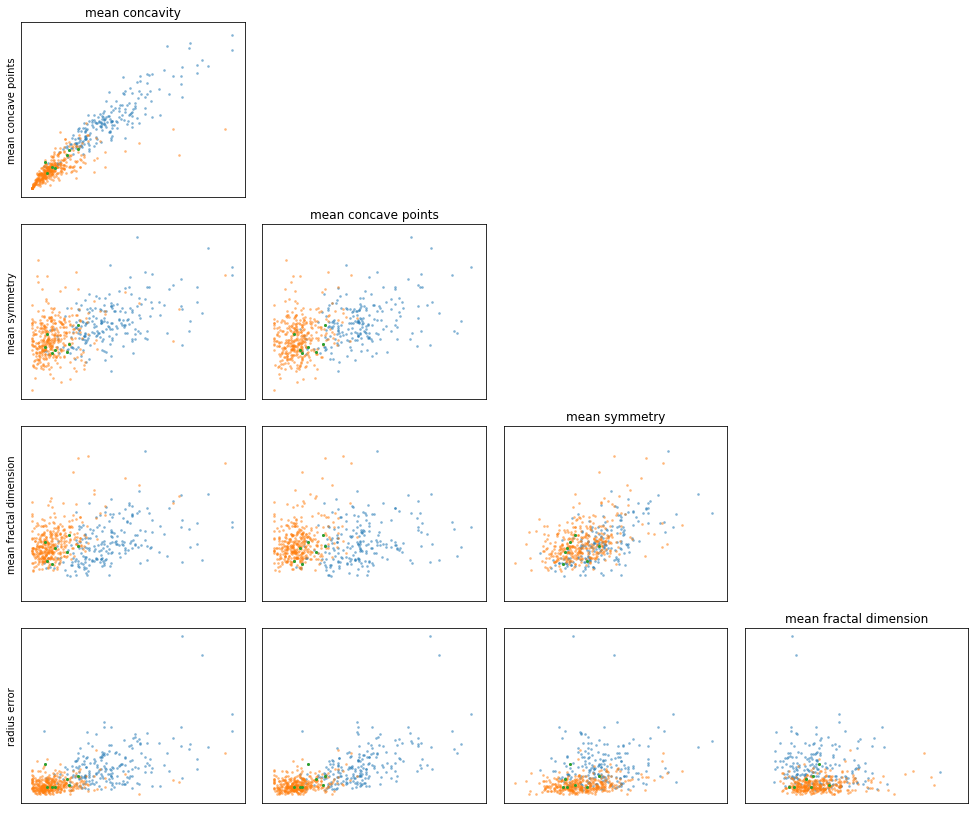

In [77]:
plt.figure(figsize=(17,14))
s = 3 # tamanho dos pontos no scatter plot
cols = data.columns[6:11]
n = len(cols)
for k, col1 in enumerate(cols):
    for j, col2 in enumerate(cols):
        if j >= k:
            continue
                 
        plt.subplot(n,n,(k*n) + j +1)
        
        for i in {0, 1}:
            plt.scatter(data.loc[y==i, col2], data.loc[y==i, col1], alpha = .4, s = s)
        plt.scatter(data.loc[m, col2], data.loc[m, col1], alpha = 1, s = s+1)
        
        if j == k - 1:
            plt.title(col2)
        if j == 0:
            plt.ylabel(col1)
            
        plt.xticks(())
        plt.yticks(())
        
plt.tight_layout()

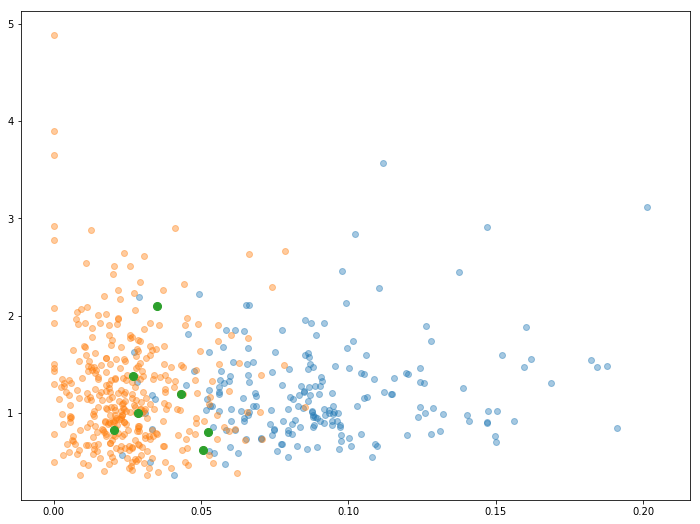

In [57]:
plt.figure(figsize=(12,9))
col1 = "texture error"
col2 = "mean concave points"
for i in {0, 1}:
    plt.scatter(data.loc[y==i, col2], data.loc[y==i, col1], alpha = .4)
plt.scatter(data.loc[m, col2], data.loc[m, col1], alpha = 1, s = 65)

# 5) Visualição das múltiplas dimensões reduzidas em 2, para comparar erros e resto

In [58]:
from sklearn.manifold import TSNE
# https://distill.pub/2016/misread-tsne/

In [59]:
man = TSNE()

In [60]:
e = man.fit_transform(d)

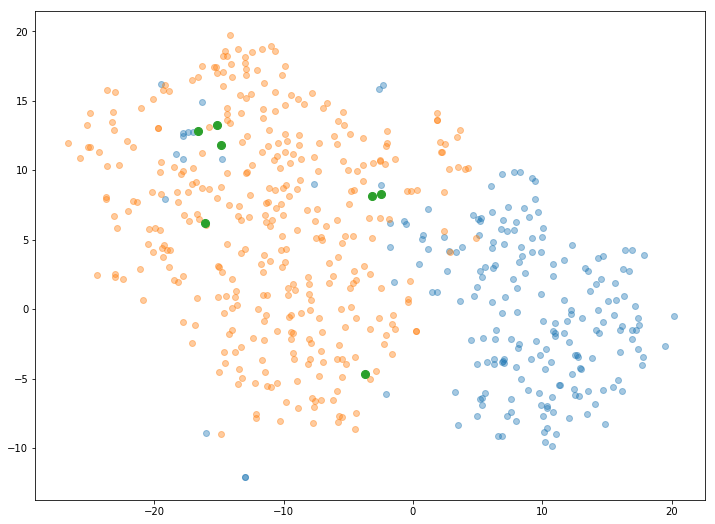

In [61]:
plt.figure(figsize=(12,9))

for i in {0, 1}:
    plt.scatter(e[y==i, 0], e[y==i, 1], alpha = .4)
plt.scatter(e[m, 0], e[m, 1], alpha = 1, s = 65)